In [3]:
# Make sure to install pgmpy first via:
!pip install pgmpy

In [4]:
try:
    from pgmpy.models import BayesianModel
except ImportError:
    from pgmpy.models import BayesianNetwork as BayesianModel

In [9]:
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian network structure.
# Nodes: OC, FT, CT, FP, IP, CRP.
# Arcs:
#    CT -> FT, CT -> FP, FT -> FP, FT -> IP, OC -> IP, OC -> CRP.
# Instead of BayesianModel or BayesianNetwork, use DiscreteBayesianNetwork
from pgmpy.models import DiscreteBayesianNetwork
Network = DiscreteBayesianNetwork([
    ('CT', 'FT'),
    ('CT', 'FP'),
    ('FT', 'FP'),
    ('FT', 'IP'),
    ('OC', 'IP'),
    ('OC', 'CRP')
])

# Update model creation to use DiscreteBayesianNetwork as well
model = DiscreteBayesianNetwork([
    ('CT', 'FT'),
    ('CT', 'FP'),
    ('FT', 'FP'),
    ('FT', 'IP'),
    ('OC', 'IP'),
    ('OC', 'CRP')
])

In [10]:
# Define CPDs.
# CPD for OC (Card holder owns a computer, tablet or smart phone)
# P(OC=True)=0.8, P(OC=False)=0.2.
cpd_oc = TabularCPD(variable='OC', variable_card=2,
                    values=[[0.8], [0.2]])




In [11]:
# CPD for CT (Card holder is currently traveling)
# P(CT=True)=0.05, P(CT=False)=0.95.
cpd_ct = TabularCPD(variable='CT', variable_card=2,
                    values=[[0.05], [0.95]])



In [12]:
# CPD for FT (Transaction is fraudulent), which depends on CT.
# When CT is True: P(FT=True)=0.01, P(FT=False)=0.99;
# When CT is False: P(FT=True)=0.004, P(FT=False)=0.996.
cpd_ft = TabularCPD(variable='FT', variable_card=2,
                    values=[[0.01, 0.004],
                            [0.99, 0.996]],
                    evidence=['CT'], evidence_card=[2])


In [13]:
# CPD for FP (Foreign purchase), which depends on CT and FT.
# Order of parent states: (CT, FT):
# - (True, True): FP=True=0.9, FP=False=0.1
# - (True, False): FP=True=0.9, FP=False=0.1
# - (False, True): FP=True=0.1, FP=False=0.9
# - (False, False): FP=True=0.01, FP=False=0.99
cpd_fp = TabularCPD(variable='FP', variable_card=2,
                    values=[[0.9, 0.9, 0.1, 0.01],
                            [0.1, 0.1, 0.9, 0.99]],
                    evidence=['CT', 'FT'], evidence_card=[2, 2])


In [14]:
# CPD for IP (Internet purchase), which depends on OC and FT.
# Order of parent states: (OC, FT):
# For OC=True:
#   If FT=True: P(IP=True)=0.15, P(IP=False)=0.85.
#   If FT=False: P(IP=True)=0.10, P(IP=False)=0.90.
# For OC=False:
#   If FT=True: P(IP=True)=0.051, P(IP=False)=0.949.
#   If FT=False: P(IP=True)=0.001, P(IP=False)=0.999.
cpd_ip = TabularCPD(variable='IP', variable_card=2,
                    values=[[0.15, 0.10, 0.051, 0.001],
                            [0.85, 0.90, 0.949, 0.999]],
                    evidence=['OC', 'FT'], evidence_card=[2, 2])


In [15]:
# CPD for CRP (Computer-related purchase in past week), which depends on OC.
# For OC=True: P(CRP=True)=0.10, P(CRP=False)=0.90.
# For OC=False: P(CRP=True)=0.01, P(CRP=False)=0.99.
cpd_crp = TabularCPD(variable='CRP', variable_card=2,
                     values=[[0.10, 0.01],
                             [0.90, 0.99]],
                     evidence=['OC'], evidence_card=[2])



In [16]:
# Add CPDs to the model.
model.add_cpds(cpd_oc, cpd_ct, cpd_ft, cpd_fp, cpd_ip, cpd_crp)




In [17]:
# Verify the model structure and CPDs.
if model.check_model():
    print("The Bayesian network model is valid.")
else:
    print("There is an issue with the model.")



The Bayesian network model is valid.


In [18]:
# Display the structure (edges) of the network.
print("\nNetwork structure (edges):")
print(model.edges())



Network structure (edges):
[('CT', 'FT'), ('CT', 'FP'), ('FT', 'FP'), ('FT', 'IP'), ('OC', 'IP'), ('OC', 'CRP')]


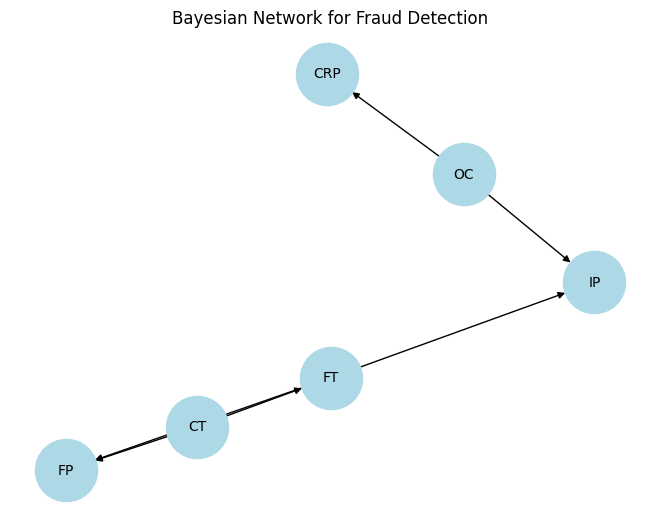

In [20]:
# Optionally, visualize the network graph.
nx_graph = nx.DiGraph(model.edges())
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
plt.title("Bayesian Network for Fraud Detection")
plt.show()



In [21]:
# Print the CPDs for inspection.
print("\nConditional Probability Tables (CPDs):\n")
print("CPD for OC:")
print(cpd_oc, "\n")
print("CPD for CT:")
print(cpd_ct, "\n")
print("CPD for FT:")
print(cpd_ft, "\n")
print("CPD for FP:")
print(cpd_fp, "\n")
print("CPD for IP:")
print(cpd_ip, "\n")
print("CPD for CRP:")
print(cpd_crp, "\n")


Conditional Probability Tables (CPDs):

CPD for OC:
+-------+-----+
| OC(0) | 0.8 |
+-------+-----+
| OC(1) | 0.2 |
+-------+-----+ 

CPD for CT:
+-------+------+
| CT(0) | 0.05 |
+-------+------+
| CT(1) | 0.95 |
+-------+------+ 

CPD for FT:
+-------+-------+-------+
| CT    | CT(0) | CT(1) |
+-------+-------+-------+
| FT(0) | 0.01  | 0.004 |
+-------+-------+-------+
| FT(1) | 0.99  | 0.996 |
+-------+-------+-------+ 

CPD for FP:
+-------+-------+-------+-------+-------+
| CT    | CT(0) | CT(0) | CT(1) | CT(1) |
+-------+-------+-------+-------+-------+
| FT    | FT(0) | FT(1) | FT(0) | FT(1) |
+-------+-------+-------+-------+-------+
| FP(0) | 0.9   | 0.9   | 0.1   | 0.01  |
+-------+-------+-------+-------+-------+
| FP(1) | 0.1   | 0.1   | 0.9   | 0.99  |
+-------+-------+-------+-------+-------+ 

CPD for IP:
+-------+-------+-------+-------+-------+
| OC    | OC(0) | OC(0) | OC(1) | OC(1) |
+-------+-------+-------+-------+-------+
| FT    | FT(0) | FT(1) | FT(0) | FT(1) 